# **K-Means**
## **Requirements:**
In this practice, you are required to analyze the provided Python code, complete the `TODO` sections, and perform result analysis.  The code applies the K-Means clustering algorithm to the Iris dataset—a well-known dataset in machine learning. The goal is to cluster the data points based on the `petal length (cm)` and `petal width (cm)` features and then map these clusters to the actual species labels to calculate a custom `accuracy`.

### **Deadline:** 22:00, Dec. 6th

The practice will be checked in this lab class or the next lab class (before **Dec. 6th**) by teachers or SAs.

### **Grading:**
* Submissions in this lab class: 1.1 points.
* Submissions on time: 1 point.
* Late submissions within 2 weeks after the deadline: 0.8 points.

In [32]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [33]:
from sklearn.datasets import load_iris
import pandas as pd
# Load Iris data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Check the structure
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Text(0, 0.5, 'Number')

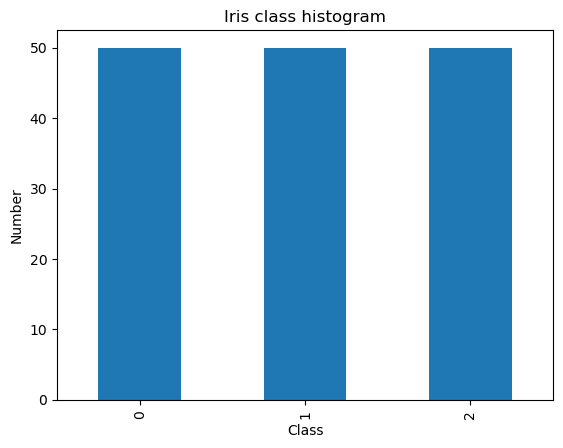

In [35]:
#count_classes = pd.value_counts(data['target'], sort=True).sort_index()
count_classes = pd.Series(df['target']).value_counts().sort_index()
count_classes.plot(kind='bar')
plt.title("Iris class histogram")
plt.xlabel("Class")
plt.ylabel("Number")

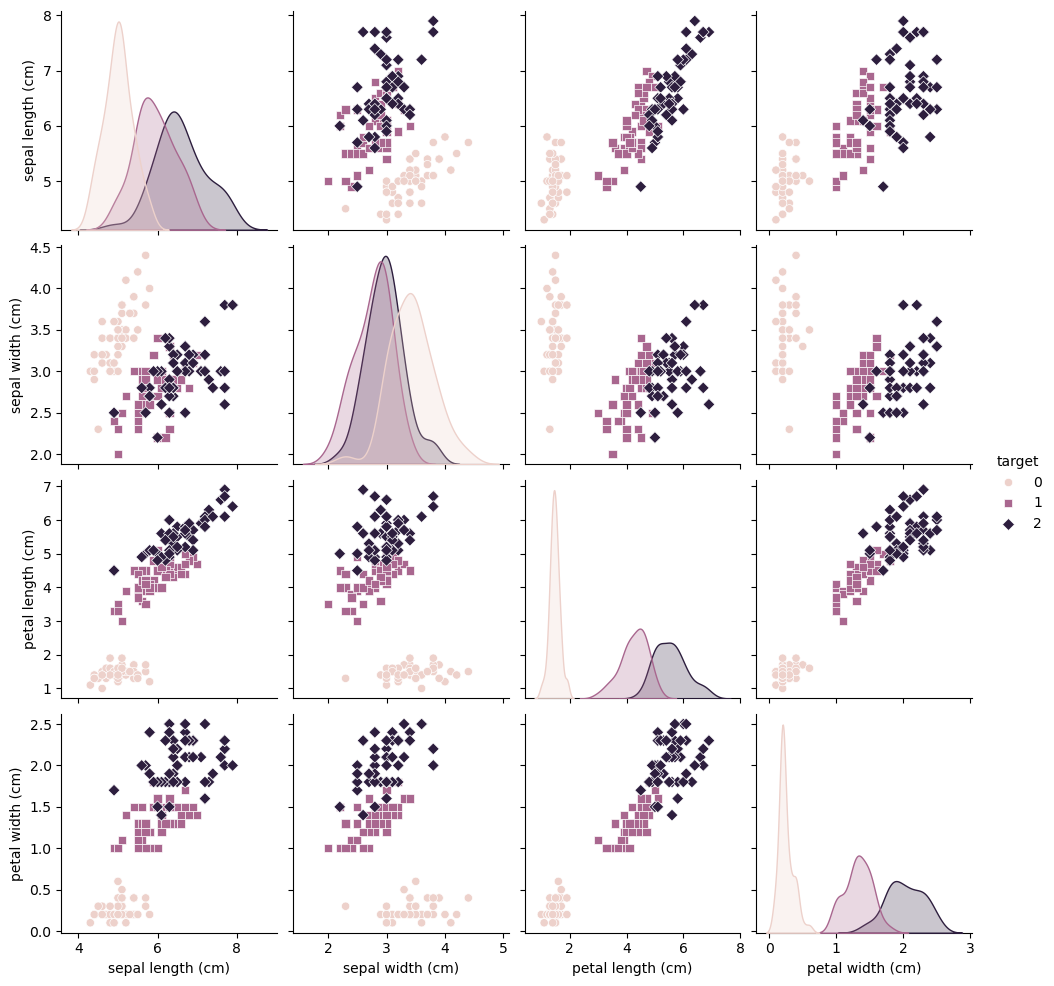

In [36]:
import seaborn as sns
# Pairplot to visualize relationships
sns.pairplot(df, hue="target", markers=["o", "s", "D"])
plt.show()

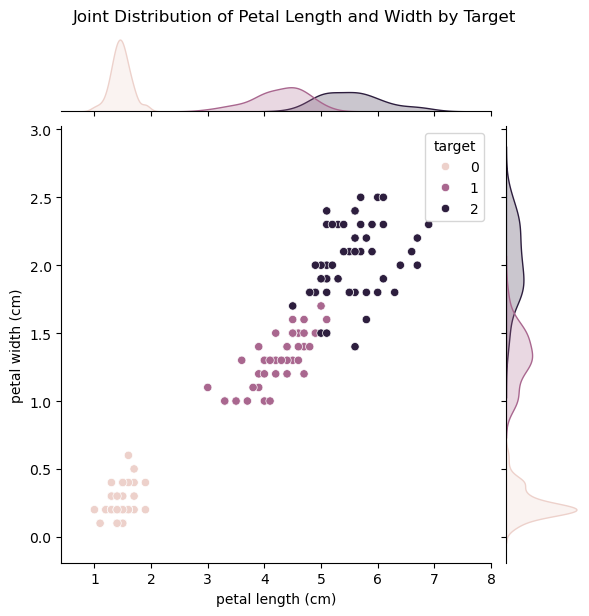

In [37]:
sns.jointplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', marker="o")
plt.suptitle('Joint Distribution of Petal Length and Width by Target', y=1.02) 
plt.show()

In [38]:
# using sklearn:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
#TODO: Apply KMeans clustering,  Select only 'petal length (cm)' and 'petal width (cm)' features for clustering
X = df[['petal length (cm)', 'petal width (cm)']].values

#TODO: Fit the model to the data and predict the cluster labels, which are then added to the DataFrame as a new column 'cluster
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

#TODO: Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

#print
df['cluster'], centroids

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 145    0
 146    0
 147    0
 148    0
 149    0
 Name: cluster, Length: 150, dtype: int32,
 array([[5.59583333, 2.0375    ],
        [1.462     , 0.246     ],
        [4.26923077, 1.34230769]]))

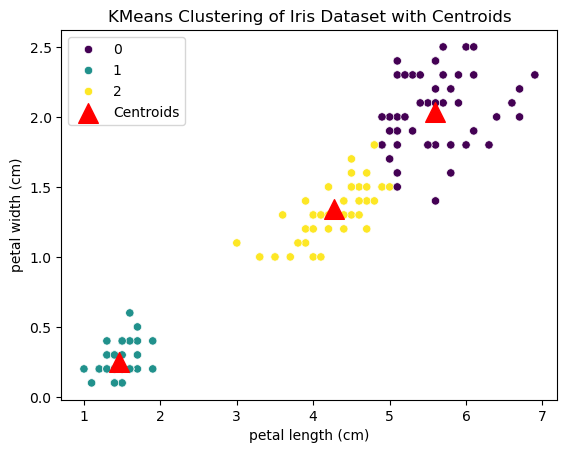

In [39]:
# Use seaborn to plot the scatter plot
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='cluster', palette='viridis')

# Plot the centroids on the scatter plot
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='^', label='Centroids')

# # Add legend and title
plt.legend()
plt.title('KMeans Clustering of Iris Dataset with Centroids')

# Display the plot
plt.show()

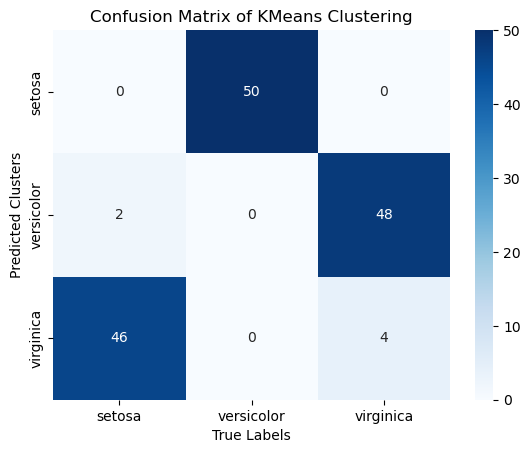

In [40]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df['target'], df['cluster'])

# Plot the heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix of KMeans Clustering')
plt.xlabel('True Labels')
plt.ylabel('Predicted Clusters')
plt.show()

In [41]:
#TODO: Calculate accuracy
from scipy.stats import mode
from sklearn.metrics import accuracy_score
# Since the labels from KMeans might differ from the true labels, we need to map the clustering results to the true labels
# Find the most frequent true label for each cluster. Hint:the mode function should return the most frequent value in the 'target' column for each cluster

# Map each cluster to the true label
label_mapping = {}
for cluster in range(3):
    mask = (df['cluster'] == cluster) # Select all data points assigned to this cluster
    most_frequent_label = mode(df['target'][mask], keepdims=True).mode[0]   # Find the most frequent true label
    label_mapping[cluster] = most_frequent_label

# Map clusters to labels
df['mapped_cluster'] = df['cluster'].map(label_mapping)

# Calculate accuracy
accuracy = accuracy_score(df['target'], df['mapped_cluster'])
accuracy

0.96